In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Loan Defaulters/accepted_2007_to_2018Q4.csv.gz', parse_dates=['issue_d'], infer_datetime_format=True)
data = data[(data.issue_d >= '2018-01-01 00:00:00') & (data.issue_d < '2019-01-01 00:00:00')]
data = data.reset_index(drop=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,130954621,NaN,5000.0,5000.0,5000.0,36 months,20.39,186.82,D,D4,General Manager,8 years,RENT,50000.0,Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,740xx,OK,21.80,1.0,Jan-2009,665.0,669.0,0.0,9.0,NaN,5.0,0.0,116.0,23.2,18.0,w,3780.31,3780.31,...,33430.0,19344.0,500.0,27820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,130964697,NaN,15000.0,15000.0,15000.0,36 months,9.92,483.45,B,B2,IT Director,2 years,OWN,196000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,337xx,FL,18.29,0.0,Jul-1998,700.0,704.0,0.0,65.0,NaN,19.0,0.0,24243.0,46.3,53.0,w,10878.50,10878.50,...,605228.0,137713.0,28500.0,147178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,130955326,NaN,11200.0,11200.0,11200.0,60 months,30.79,367.82,G,G1,Client services,< 1 year,RENT,44000.0,Not Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,medical,Medical expenses,030xx,NH,43.97,1.0,Jul-2007,665.0,669.0,2.0,6.0,NaN,8.0,0.0,1526.0,24.6,14.0,w,10193.73,10193.73,...,80367.0,67173.0,1900.0,74167.0,7101.0,610.0,614.0,Feb-2005,3.0,1.0,14.0,80.0,11.0,8.0,0.0,2.0,37.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,130504052,NaN,25000.0,25000.0,25000.0,60 months,21.85,688.35,D,D5,Asphalt Supervisor,10+ years,MORTGAGE,65000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,361xx,AL,12.89,1.0,Mar-1995,665.0,669.0,1.0,22.0,NaN,7.0,0.0,8657.0,98.4,16.0,w,22188.73,22188.73,...,101234.0,17039.0,3300.0,10220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,130956066,NaN,3000.0,3000.0,3000.0,36 months,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,Source Verified,2018-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,988xx,WA,0.58,0.0,Jan-1998,760.0,764.0,0.0,26.0,NaN,7.0,0.0,141.0,0.5,30.0,w,0.00,0.00,...,191216.0,141.0,30500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495242 entries, 0 to 495241
Columns: 151 entries, id to settlement_term
dtypes: datetime64[ns](1), float64(113), object(37)
memory usage: 570.5+ MB


In [ ]:
data.shape

(495242, 151)

In [ ]:
data.dtypes

id                                                    object
member_id                                            float64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status             

In [ ]:
# Obtaining the columns with more nan values with 30% nul values

In [ ]:
drop_null_col = data.isnull().sum()/len(data)*100
drop_null_col = drop_null_col[drop_null_col.values >= 30 ]
drop_null_col = drop_null_col.index.tolist()
print(drop_null_col)
len(drop_null_col)

['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount',

43

In [ ]:
# dropping the drop_null_col list 
print('Dropping columns with more than 30% null values')
data.drop(labels = drop_null_col,axis = 1,inplace = True)
print(f'{len(drop_null_col)} columns dropped')

Dropping columns with more than 30% null values
43 columns dropped


In [ ]:
unique_counts = data.nunique()
unique_counts = unique_counts[unique_counts.values == 1].index.tolist()
# Dropping the single_unique columns 
data.drop(labels = unique_counts,axis =1, inplace=True)

In [ ]:
drop_list_1 = ['id','funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d']
data.drop(labels = drop_list_1,axis = 1,inplace = True)

In [ ]:
drop_list_2 = ['url','zip_code','inq_last_6mths','out_prncp','out_prncp_inv','total_rec_prncp',
               'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                'last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d']

In [ ]:
data.drop(labels = drop_list_2,axis = 1,inplace = True)

In [ ]:
drop_list_3 = ['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc',
               'mths_since_recent_inq',         
                'num_accts_ever_120_pd',             
                'num_actv_bc_tl',                    
                'num_actv_rev_tl',                   
                'num_bc_sats',                       
                'num_bc_tl',                         
                'num_il_tl',                         
                'num_op_rev_tl',                     
                'num_rev_accts',                     
                'num_rev_tl_bal_gt_0',               
                'num_sats',                          
                'num_tl_30dpd',                      
                'num_tl_90g_dpd_24m',                
                'num_tl_op_past_12m',                
                'pct_tl_nvr_dlq',                    
                'percent_bc_gt_75',
                'mo_sin_old_il_acct',
               'last_fico_range_high',
               'last_fico_range_low',
                   ]  

In [ ]:
data.drop(labels = drop_list_3,axis=1,inplace = True)

In [ ]:
drop_list_4 = ['total_pymnt',
 'total_pymnt_inv',
 'collections_12_mths_ex_med',
     'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 ]

In [ ]:
data.drop(labels = drop_list_4,axis = 1,inplace =True)

In [ ]:
drop_list_5 = ['tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [ ]:
data.drop(labels = drop_list_5,axis = 1,inplace = True)

In [ ]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=f26a485184d896ae51b47d3264345afb2188f2e6f35cd27c89abd2c178696004
  Stored in directory: /tmp/pip-ephem-wheel-cache-qw0n2del/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport
#profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()

In [ ]:
#profile.to_file("/content/drive/My Drive/Loan Defaulters.html")

In [ ]:
loan = data.loc[data['loan_status'].isin(['Fully Paid','Charged Off'])]

In [ ]:
#profile = ProfileReport(loan, title='Pandas Profiling Report 2 ', explorative=True)
#profile.to_file('/content/drive/My Drive/Loan Defaulters.html')

In [ ]:
loan.drop(labels = 'pymnt_plan',axis = 1,inplace = True)

In [ ]:
# Treating the fico sccores 
# Changing the values by taking an average to form an average column 
fico_col = ['fico_range_low','fico_range_high']
loan['fico_average'] = (loan['fico_range_low'] + loan['fico_range_high']) /2


In [ ]:
loan.drop(labels = fico_col,axis = 1,inplace= True)

In [ ]:
profile = ProfileReport(loan, title='Pandas Profiling Report  ', explorative=True)
profile.to_file('/content/drive/My Drive/Loan Defaulters.html')

In [ ]:
loan['loan_status'].replace(to_replace=['Fully Paid','Charged Off'],value=[1,0],inplace = True )

In [ ]:
# Tackling the loan_amnt column
def plot_var(col):
  fig,ax = plt.subplots(1,2,figsize=(12,3))
  sns.boxplot(y = col,x = 'loan_status',data = loan,ax = ax[0])
  sns.distplot(loan[col].dropna(),bins = 50,kde = False,ax = ax[1])

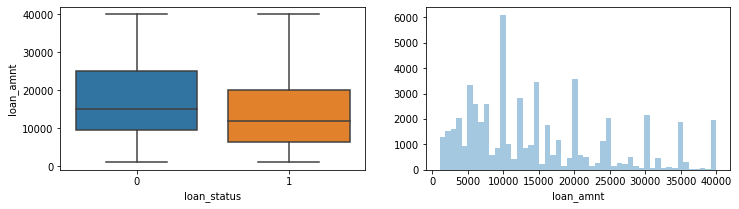

In [ ]:
plot_var('loan_amnt')

In [ ]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8867.0,17032.581482,10355.099451,1000.0,9600.0,15000.0,25000.0,40000.0
1,47444.0,14479.312980,10040.924029,1000.0,6500.0,12000.0,20000.0,40000.0


In [ ]:
loan['term'] = loan['term'].apply(lambda s: np.int8(s.split()[0]))

In [ ]:
loan['term'].value_counts(normalize=True)

36    0.732859
60    0.267141
Name: term, dtype: float64

In [ ]:
grp_loan = loan.groupby('loan_status')

In [ ]:
print('Those who were able to pay the loans\n',grp_loan.get_group(1)['term'].value_counts(normalize = True))
print('Those who could not pay the the loan \n',grp_loan.get_group(0)['term'].value_counts(normalize = True))

Those who were able to pay the loans
 36    0.754658
60    0.245342
Name: term, dtype: float64
Those who could not pay the the loan 
 36    0.616217
60    0.383783
Name: term, dtype: float64


In [ ]:
pd.crosstab(loan['term'],loan['loan_status'],normalize = 'columns',margins=True).style.background_gradient(cmap='magma')

loan_status,0,1,All
term,,,
36,0.616217,0.754658,0.732859
60,0.383783,0.245342,0.267141


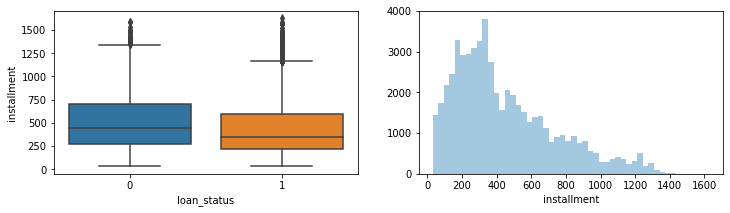

In [ ]:
plot_var('installment')

In [ ]:
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8867.0,511.057564,301.932763,30.12,275.19,445.47,703.105,1587.23
1,47444.0,431.950850,289.569695,30.12,213.56,350.22,593.225,1628.08


In [ ]:
# grade
pd.crosstab(loan['grade'],loan['loan_status'],normalize = 'columns',margins=True,dropna = True).style.background_gradient(cmap='magma')

loan_status,0,1,All
grade,,,
A,0.074546,0.256281,0.227664
B,0.201195,0.283450,0.270498
C,0.310251,0.253014,0.262027
D,0.281042,0.151273,0.171707
E,0.099583,0.045296,0.053844
F,0.027067,0.008853,0.011721
G,0.006316,0.001834,0.002539


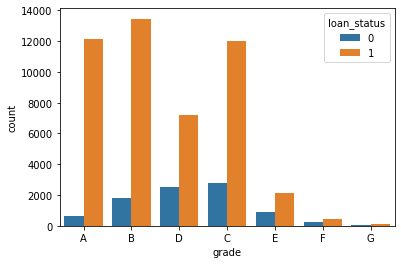

In [ ]:
sns.countplot(x = 'grade',data = loan,hue = 'loan_status')

In [ ]:
loan['emp_length'].replace(to_replace = ['10+ years','< 1 year'],value = ['10 years','0 years'], inplace = True)

In [ ]:
  loan['emp_length'] = loan['emp_length'].astype(str)
  def convert_int(s):
    if pd.isnull(s):
      return s
    else:
      return s.split()[0]

  loan['emp_length'] = loan['emp_length'].apply(lambda s :convert_int(s) )

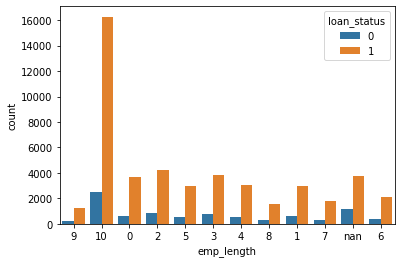

In [ ]:
sns.countplot(x = 'emp_length',data = loan,hue = 'loan_status')
#plt.xticks(rotation = 45)

In [ ]:
# emp_length
pd.crosstab(loan['emp_length'],loan['loan_status'],normalize = 'columns',margins=True,dropna = True).style.background_gradient(cmap='magma')

loan_status,0,1,All
emp_length,,,
0,0.073757,0.076870,0.076379
1,0.070486,0.063401,0.064517
10,0.282621,0.342804,0.333327
2,0.094169,0.089052,0.089858
3,0.085824,0.080495,0.081334
4,0.063945,0.064497,0.064410
5,0.060223,0.062305,0.061977
6,0.040826,0.044600,0.044006
7,0.036878,0.037307,0.037240


In [ ]:
# home ownership
pd.crosstab(loan['home_ownership'],loan['loan_status'],normalize = 'columns',margins=True,dropna = True).style.background_gradient(cmap='magma')

loan_status,0,1,All
home_ownership,,,
ANY,0.000338,0.000422,0.000408
MORTGAGE,0.382204,0.529656,0.506437
OWN,0.144581,0.131502,0.133562
RENT,0.472877,0.338420,0.359592


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

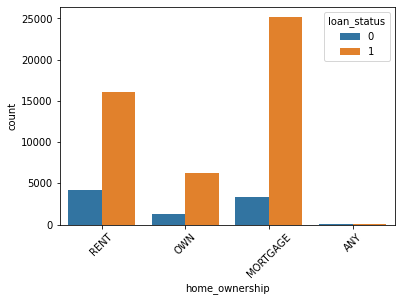

In [ ]:
sns.countplot(x = 'home_ownership',data = loan,hue = 'loan_status')
plt.xticks(rotation = 45)

In [ ]:
#verification status 
pd.crosstab(loan['verification_status'],loan['loan_status'],normalize = 'columns',margins=True,dropna = True).style.background_gradient(cmap='magma')

loan_status,0,1,All
verification_status,,,
Not Verified,0.277659,0.390987,0.373142
Source Verified,0.400474,0.400325,0.400348
Verified,0.321868,0.208688,0.226510


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

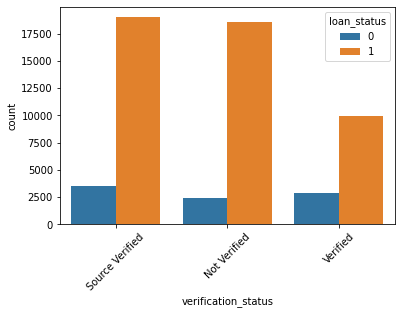

In [ ]:
sns.countplot(x = 'verification_status',data = loan,hue = 'loan_status')
plt.xticks(rotation = 45)

In [ ]:
pd.crosstab(loan['purpose'],loan['loan_status'],normalize = 'index').style.background_gradient(cmap='magma')

loan_status,0,1
purpose,,
car,0.121134,0.878866
credit_card,0.123552,0.876448
debt_consolidation,0.161498,0.838502
home_improvement,0.140013,0.859987
house,0.178536,0.821464
major_purchase,0.193245,0.806755
medical,0.205626,0.794374
moving,0.207101,0.792899
other,0.179345,0.820655


In [ ]:
loan.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,0].sort_values()

purpose
car                   0.121134
credit_card           0.123552
home_improvement      0.140013
renewable_energy      0.157895
debt_consolidation    0.161498
vacation              0.170412
house                 0.178536
other                 0.179345
major_purchase        0.193245
medical               0.205626
moving                0.207101
small_business        0.318102
wedding               0.500000
Name: loan_status, dtype: float64

In [ ]:
loan['annual_inc'].describe()

count    5.631100e+04
mean     8.007494e+04
std      7.923974e+04
min      0.000000e+00
25%      4.684200e+04
50%      6.700000e+04
75%      9.500000e+04
max      9.300000e+06
Name: annual_inc, dtype: float64

In [ ]:
loan['log_annual_inc'] = loan['annual_inc'].apply(lambda x : np.log10(x+1))

In [ ]:
loan.drop('annual_inc',axis = 1,inplace = True)

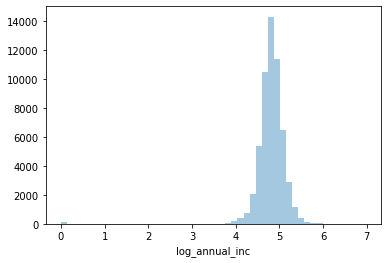

In [ ]:
sns.distplot(loan['log_annual_inc'],bins=50,kde=False)

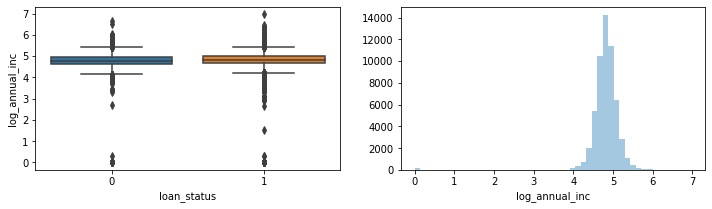

In [ ]:
plot_var('log_annual_inc')

In [ ]:
loan['log_annual_inc'].describe()

count    56311.000000
mean         4.811892
std          0.356861
min          0.000000
25%          4.670645
50%          4.826081
75%          4.977728
max          6.968483
Name: log_annual_inc, dtype: float64

In [ ]:
loan.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8867.0,4.769414,0.348711,0.0,4.619844,4.778158,4.939524,6.629411
1,47444.0,4.819830,0.357808,0.0,4.681250,4.832515,4.986776,6.968483


In [ ]:
# drop the title column 
loan.drop(labels = 'title',axis = 1,inplace = True)

In [ ]:
loan.drop(labels = 'addr_state',axis = 1,inplace = True)

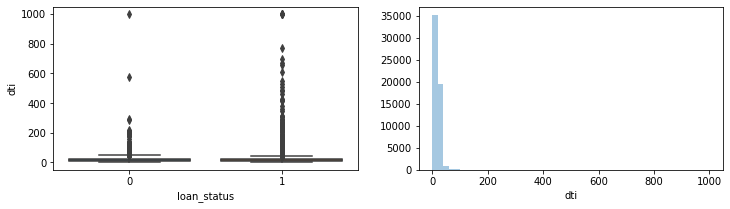

In [ ]:
plot_var('dti')

In [ ]:
loan['dti'].sample(5)

24534     27.57
4054      38.57
35765     28.11
196590     9.49
468413    36.45
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

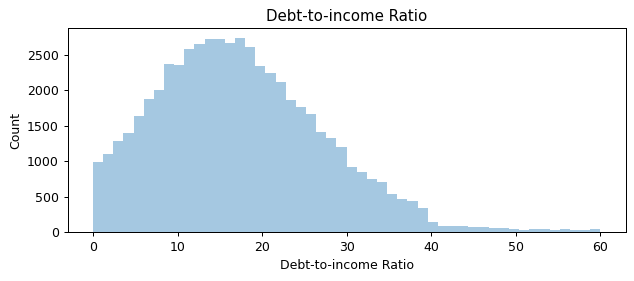

In [ ]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loan.loc[loan['dti'].notnull() & (loan['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [ ]:
loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8846.0,19.759132,18.909829,0.0,10.76,18.095,26.0075,999.0
1,47314.0,18.231164,19.057171,0.0,10.26,16.430,23.4875,999.0


In [ ]:
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [ ]:
loan['earliest_cr_line'].sample(3)

494077    2001
194002    2006
161507    2012
Name: earliest_cr_line, dtype: int64

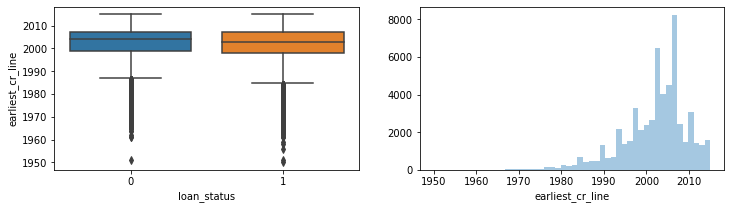

In [ ]:
plot_var('earliest_cr_line')

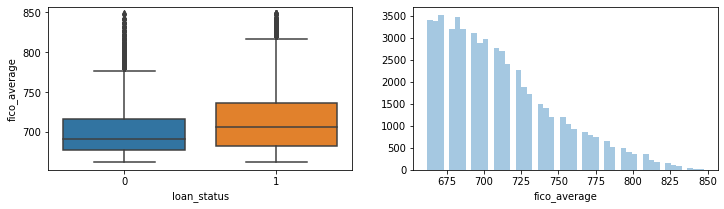

In [ ]:
plot_var('fico_average')

In [ ]:
loan.groupby('loan_status')['fico_average'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8867.0,701.725499,34.135000,662.0,677.0,692.0,717.0,847.5
1,47444.0,712.078861,38.353229,662.0,682.0,707.0,737.0,847.5


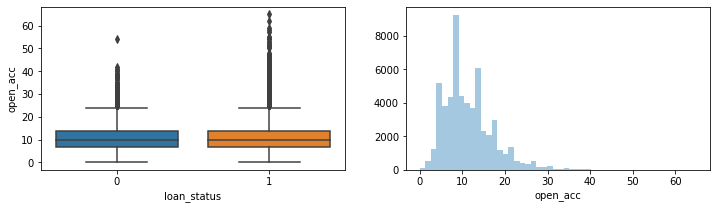

In [ ]:
plot_var('open_acc')

In [ ]:
loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8867.0,10.810872,5.758347,0.0,7.0,10.0,14.0,54.0
1,47444.0,11.511593,5.931156,0.0,7.0,10.0,14.0,65.0


In [ ]:
loan.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8867.0,0.168039,0.425027,0.0,0.0,0.0,0.0,5.0
1,47444.0,0.155763,0.401264,0.0,0.0,0.0,0.0,8.0


In [ ]:
pd.crosstab(loan['pub_rec'],loan['loan_status'],normalize = 'columns').style.background_gradient(cmap='magma')

loan_status,0,1
pub_rec,,
0.0,0.845946,0.853343
1.0,0.144355,0.140755
2.0,0.007218,0.004068
3.0,0.001015,0.001159
4.0,0.001128,0.000253
5.0,0.000338,0.000232
6.0,0.000000,0.000126
7.0,0.000000,0.000042
8.0,0.000000,0.000021


In [ ]:
loan['revol_bal'].describe()

count     56311.000000
mean      14374.930014
std       21489.868776
min           0.000000
25%        4096.000000
50%        9084.000000
75%       17412.000000
max      925589.000000
Name: revol_bal, dtype: float64

In [ ]:
loan['log_revol_bal'] = loan['revol_bal'].apply(lambda x : np.log10(x+1))

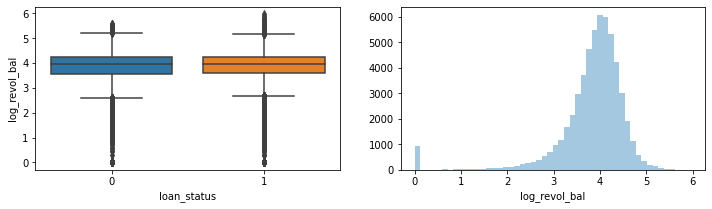

In [ ]:
plot_var('log_revol_bal')

In [ ]:
loan.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8867.0,3.788959,0.802838,0.0,3.580583,3.950267,4.230219,5.590494
1,47444.0,3.838518,0.728992,0.0,3.618257,3.959614,4.243757,5.966419


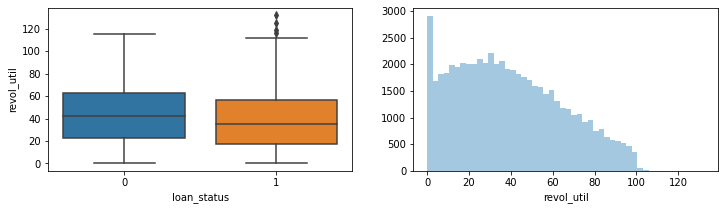

In [ ]:
plot_var('revol_util')

In [ ]:
loan.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8853.0,43.157517,26.186102,0.0,22.3,42.0,62.7,115.6
1,47384.0,38.610160,25.445574,0.0,17.7,35.4,56.9,132.2


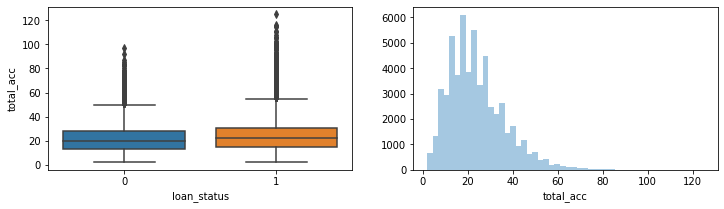

In [ ]:
plot_var('total_acc')

In [ ]:
loan.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,8867.0,21.734634,12.289631,2.0,13.0,20.0,28.0,97.0
1,47444.0,24.531321,12.784466,2.0,15.0,22.0,31.0,125.0


In [ ]:
pd.crosstab(loan['initial_list_status'],loan['loan_status'],normalize = 'all').style.background_gradient(cmap='magma')

loan_status,0,1
initial_list_status,,
f,0.030172,0.139546
w,0.127293,0.702989


In [ ]:
pd.crosstab(loan['application_type'],loan['loan_status'],normalize = 'all').style.background_gradient(cmap='magma')

loan_status,0,1
application_type,,
Individual,0.132567,0.741596
Joint App,0.024897,0.100939


In [ ]:
pd.crosstab(loan['pub_rec_bankruptcies'],loan['loan_status'],normalize = 'index',margins = True).style.background_gradient(cmap='magma')

loan_status,0,1
pub_rec_bankruptcies,,
0.0,0.157111,0.842889
1.0,0.158382,0.841618
2.0,0.294872,0.705128
3.0,0.090909,0.909091
All,0.157465,0.842535


In [ ]:
drop = ['delinq_2yrs','revol_bal','delinq_amnt']
loan.drop(labels= drop,axis = 1,inplace = True)